# Which is Better Analysis

This program will perform the calculation of Elo ratings and correlation of these ratings with fitness function distances for image data from thr Which is Better experiment.

We begin by importing the libraries we need and choosing our image and its corresponding data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import EloAnalysis as EA
import Correlation as Cor

image = "Waterbottle"
files = [f"Which_Is_Better_Data/Dirk_{image}_choices_matrix.csv",
         f"Which_Is_Better_Data/Maryam_{image}_choices_matrix.csv",
         f"Which_Is_Better_Data/Nathan_{image}_choices_matrix.csv",
         f"Which_Is_Better_Data/Doruk_{image}_choices_matrix.csv",
         f"Which_Is_Better_Data/Andrew_{image}_choices_matrix.csv"]


Now we will calculate and plot the raw Elo scores for this image set.

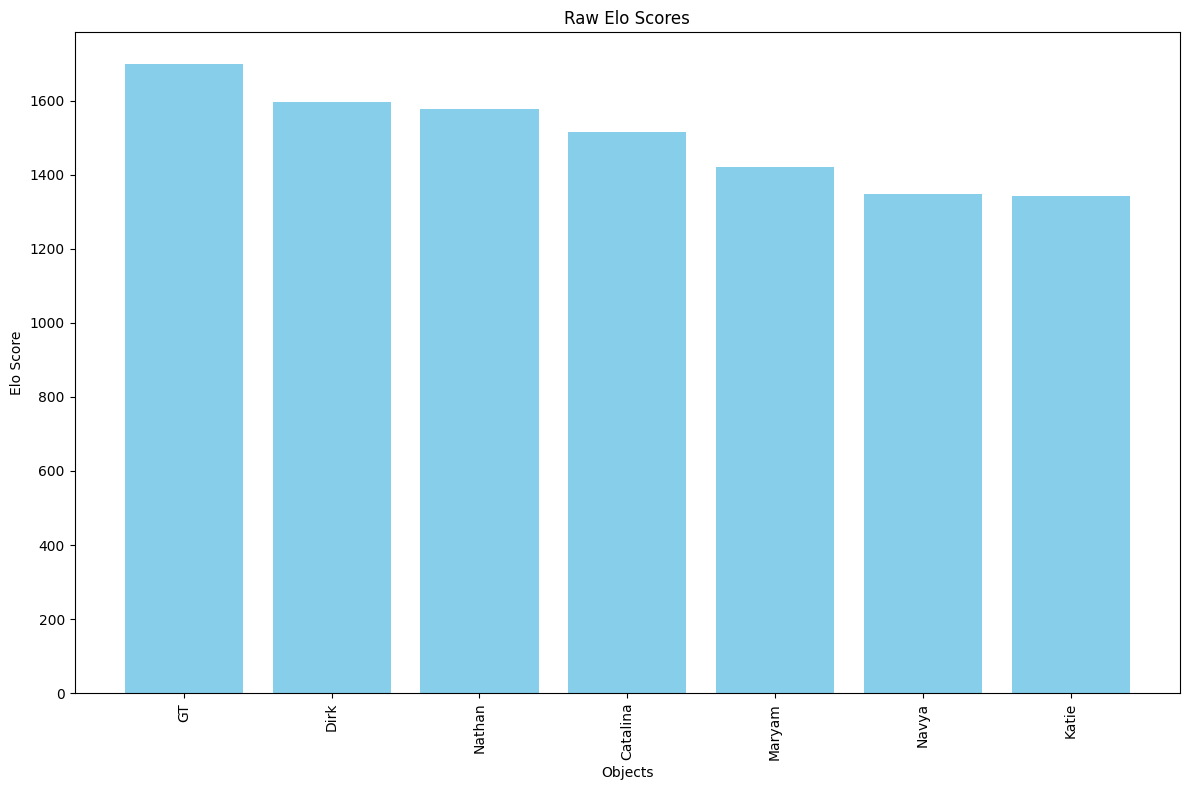

In [14]:
K = 32
initial_ratings = EA.process_files(files, K)
sorted_ratings = sorted(initial_ratings.items(), key=lambda x: x[1], reverse=True)
objects, ratings = zip(*sorted_ratings)  # Unpack the objects and their ratings
EA.plot_ratings(objects, ratings, "Raw Elo Scores", "Objects", "Elo Score")

These will be more useful for comparison with fitness function results when normalized to a 0 to 1 scale, so we proceed with this and plot them once more.

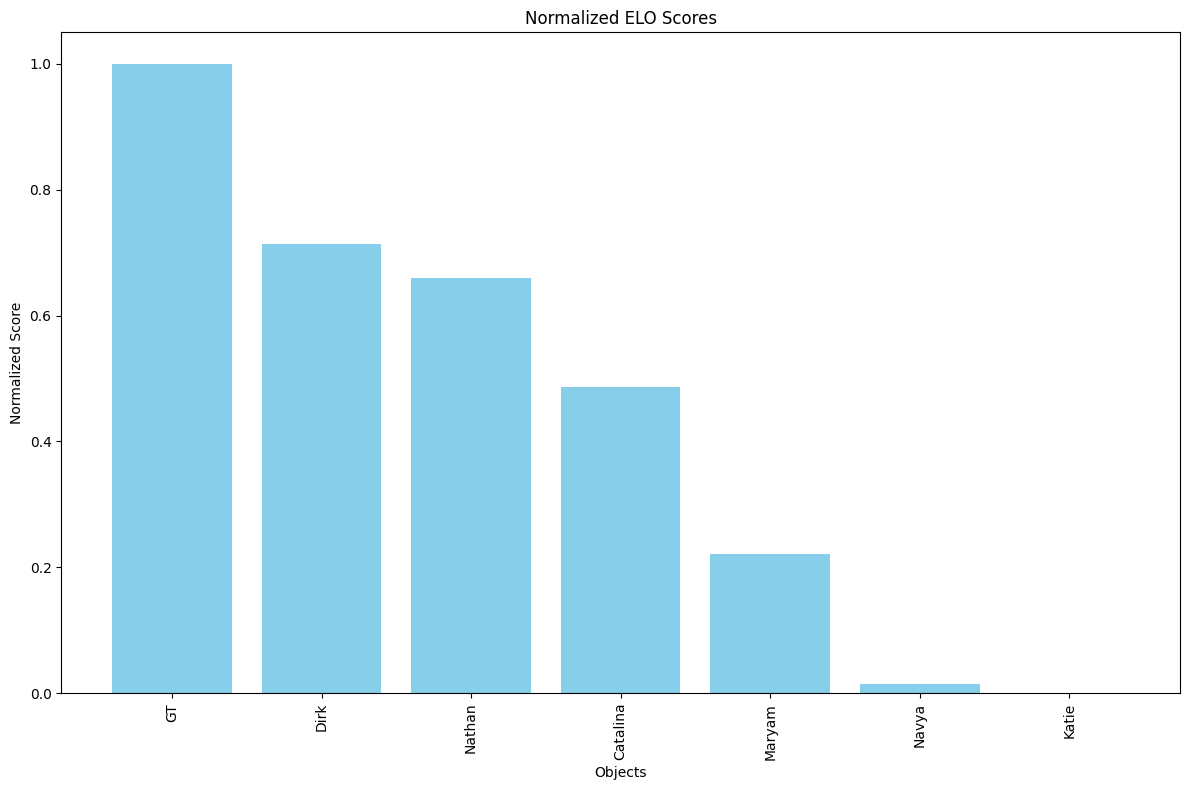

In [12]:
normalized_scores = EA.sort_and_normalize_ratings(initial_ratings)
distance_matrix, objects_list = EA.create_distance_matrix(normalized_scores)
objects, normalized_ratings = zip(*normalized_scores)  # Unpack the objects and their normalized ratings
EA.plot_ratings(objects, normalized_ratings, "Normalized ELO Scores", "Objects", "Normalized Score")

And now we'll export this to a CSV file for use in the regression analysis.

In [ ]:
distance_df = pd.DataFrame(distance_matrix, index=objects_list, columns=objects_list)
csv_file_path = f'{image}_Elo_distance_matrix.csv'
distance_df.to_csv(csv_file_path)

Now we'll produce the distance matrices for the fitness functions. It takes time to run all of the fitness functions, so this one may take a little while.

In [ ]:
Cor.process_images_in_folder('images/a_walk_in_the_park')
Cor.process_images_in_folder('images/Mushrooms')
Cor.process_images_in_folder('images/Waterbottle')

Then finally run and visualize our linear regression.

In [ ]:
images =["Waterbottle", "Mushrooms","a_walk_in_the_park"]
for image in images:
     independent_csv = f'Analysis/{image}_Elo_abs_distance_matrix.csv'
     dependent_csvs = [f'Analysis/{image}_FF_ML2DHD_V2_distance_matrix.csv', 
                      f'Analysis/{image}_FF_Gamma_distance_matrix.csv',
                      f'Analysis/{image}_FF_Hamming_distance_matrix.csv',
                      f'Analysis/{image}_FF_ML2DHD_distance_matrix.csv']
     labels = ['FF_ML2DHD_V2', 'FF_Gamma', 'FF_Hamming', 'FF_ML2DHD']

     Correlation.plot_regression(independent_csv, dependent_csvs, labels)
     Correlation.perform_regression_significance_test(independent_csv, dependent_csvs, labels)